# Practicing - Trees and Random Forest Project with Python

## 1. Backgroung 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## 2. Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
loans = pd.read_csv('loan_data.csv')

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


** Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 4. Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

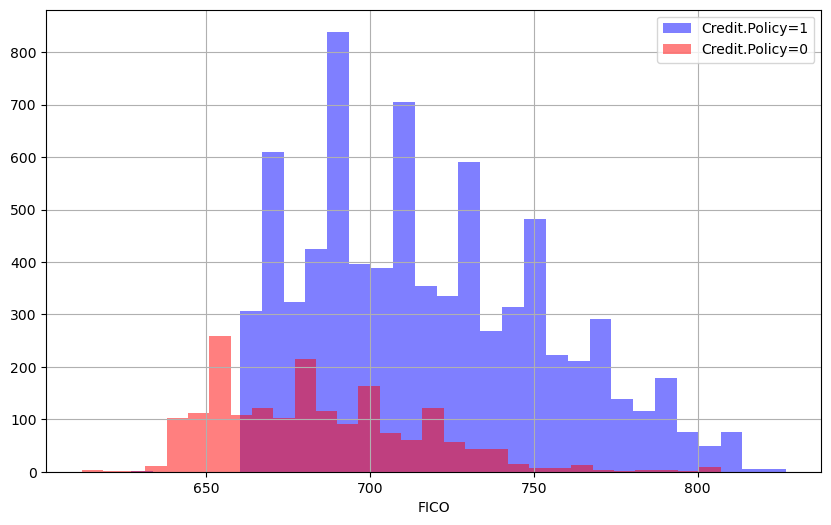

In [13]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue',
                                             bins=30, label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, color='red',
                                             bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

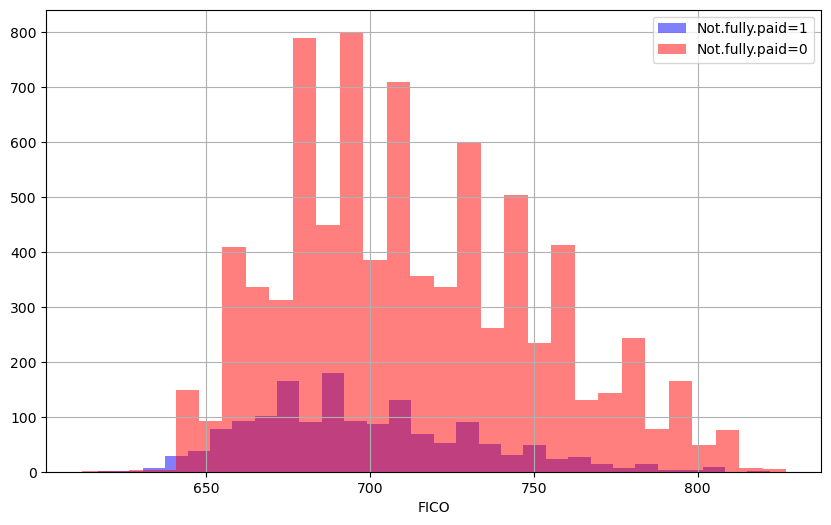

In [17]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue',
                                             bins=30, label='Not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red',
                                             bins=30, label='Not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<Axes: xlabel='purpose', ylabel='count'>

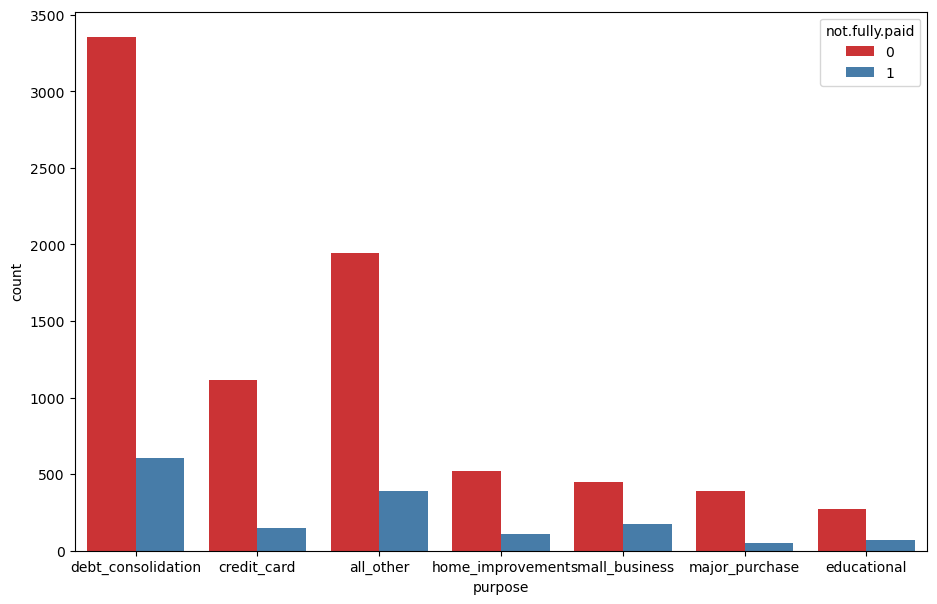

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

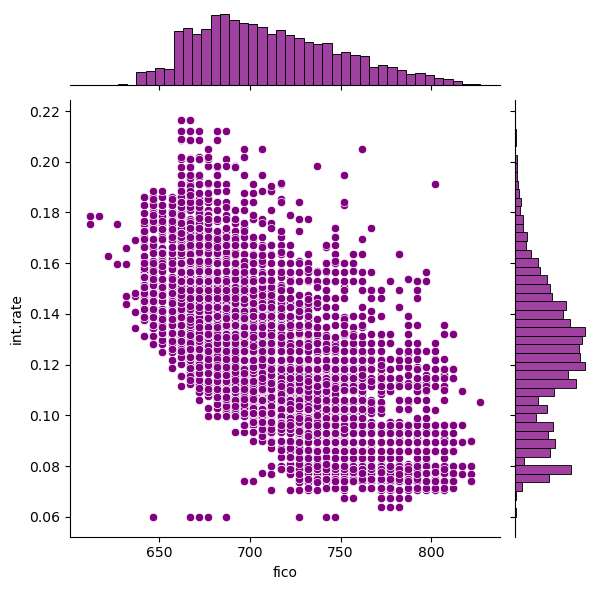

In [21]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 1100x700 with 0 Axes>

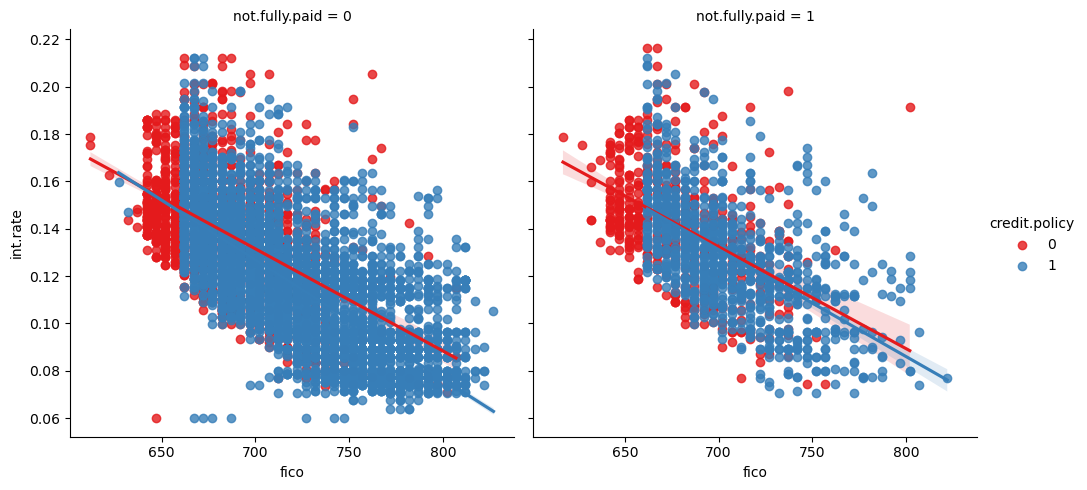

In [22]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy',
          col='not.fully.paid', palette='Set1')

## 5. Setting up the Data for Decision Tree and for Random Forest Classifiers

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() #again.**

In [23]:
loans.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### 5.1 Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [30]:
cat_feats = ['purpose']
cat_feats

['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [32]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### 5.2 Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [34]:
from sklearn.model_selection import train_test_split

In [50]:
# Features
X = final_data.drop('not.fully.paid', axis=1)
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [49]:
# Target
y = final_data['not.fully.paid']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 6. Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

### 6.1 Train the Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [58]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4845,1,0.1426,548.90,10.714418,14.67,682,3959.958333,9092,23.2,0,0,0,0,1,0,0,0,0
6910,1,0.0774,312.19,10.819778,0.86,772,5190.041667,2232,6.5,0,0,0,0,0,0,0,0,0
8146,0,0.1520,208.59,10.491274,18.53,642,3270.000000,6970,76.6,4,1,0,0,1,0,0,0,0
7113,1,0.1385,511.56,10.950807,12.74,682,3420.041667,21113,72.6,2,0,0,0,0,0,0,0,0
195,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0,1,0,0,0,0,0


In [59]:
y_train.head()

4845    1
6910    0
8146    1
7113    0
195     0
Name: not.fully.paid, dtype: int64

In [60]:
dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### 6.2 DecisionTree Model: Make Predictions and Evaluation
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [78]:
dtree_predictions = dtree.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(confusion_matrix(y_test, dtree_predictions))

[[1984  447]
 [ 345   98]]


In [83]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



## 7. Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

### 7.1 Train the Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=100)

In [73]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### 7.2 Random Forest Model: Make Predictions and Evaluation

In [74]:
rfc_predictions = rfc.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
print(confusion_matrix(y_test, rfc_predictions))

[[2420   11]
 [ 433   10]]


In [82]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.48      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



## 8. Interpretation

**There are four ways to check if the predictions are right or wrong:**

* TN = True Negative: the case was negative and predicted negative
* TP = True Positive: the case was positive and predicted positive
* FN = False Negative: the case was positive but predicted negative
* FP = False Positive: the case was negative but predicted positive

**Precision = TP/(POSITIVES) = TP/(TP + FP)**

* Same as *accuracy of positive predictions*

* Precision is the ability of a classifier not to label an instance positive that is actually negative.

* The lower the number of false positives, the better the precision (accuracy).

**Recall = TP/(TP+FN)**

* Same as sensitivity or hit rate

* Recall is what percent of positive is really positive

* Recall indicates what percent of the positive cases did we catch

* Recall is the ability of a classifier to find all positive instances.
* The lower the number of false negatives, the better the recall.
* Recall (sensitivity) indicates how many positives were correctly identified among the total of posivites.

**F1 Score = 2 x (Recall x Precision) / (Recall + Precision)**

* F1 score indicates what percent of positive predictions were correct
* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
* As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support**

* Support is the number of actual occurrences of the class in the specified dataset.

**What performed better the random forest or the decision tree?**

If we compare the recall metric, neither model performed well. More feature engineering is needed.